# **LEZIONE 3**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

### Exercise 03.1  Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes  analytic solution  for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [2]:
# analytic solution for comparison
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## **Esercizio 3.1**

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1.  By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2.  By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Le opzioni sono un prodotto finanziario in cui il detentore ottiene dallo scrittore il diritto di acquistare (opzione call) o di vendere (opzione put) un’attività ad un prezzo prefissato, chiamato prezzo di esercizio (strike price). In questo tipo di contratti, solo lo scrittore ha un’obbligazione, e nel caso delle opzioni europee, il contratto può essere esercitato solo alla data di scadenza $T$.

Ovviamente, il detentore eserciterà l’opzione solo se questa gli porta un profitto, cioè, a seconda del tipo di opzione:

$$
\text{Profitto Call} = \max(S_T - K, 0)
$$
$$
\text{Profitto Put} = \max(K - S_T, 0)
$$

dove $S_T$ è il prezzo spot dell’attività oggetto dell’opzione al momento in cui l’opzione può essere riscattata (cioè alla scadenza 
𝑇) e 𝐾 è il prezzo di esercizio.

Nota che per ottenere il profitto al momento della stipula del contratto, bisogna scontare l’espressione precedente moltiplicandola per un fattore 
$e^{−rT} $ , corrispondente alla crescita che il prezzo dell’attività avrebbe subito fino al tempo 𝑇 dovuta al tasso di interesse privo di rischio 𝑟:

$$
\text{Valore attuale} = e^{-rT} \times \max(\text{Espressione di profitto}, 0)
$$

### Prezzo delle Opzioni con il Moto Geometrico Browniano (GBM)

La valutazione delle opzioni tramite moto browniano geometrico (Geometric Brownian Motion, GBM) si basa sulla teoria di Black-Scholes, che assume che l'evoluzione temporale del prezzo dell’attività segua un processo stocastico, e in particolare un GBM, con tasso di interesse privo di rischio e volatilità costanti.

Per valutare il prezzo di un’opzione in funzione del tempo, possiamo simularlo con:
$$
S(t) = S_0 \cdot e^{\left(r - \frac{1}{2}\sigma^2\right)t + \sigma W(t)}
$$
dove:
- $S(t)$ è il prezzo dell’attività al tempo t
- $S_0$ è il prezzo iniziale
- $r$ è il tasso di interesse privo di rischio
- $\sigma$ è la volatilità
- $W(t)$ è un moto browniano standard

Poiché gli incrementi di $W(t)$ sono indipendenti e normalmente distribuiti, si può utilizzare una semplice procedura ricorsiva per campionare i valori discreti di $S$ ai tempi $t_i$:
$$
S_{i+1} = S_i \cdot e^{\left(r - \frac{1}{2}\sigma^2\right)\Delta t + \sigma Z_i \sqrt{\Delta t}}
$$
con:

- $Z_i \sim \mathcal{N}(0,1)$, una variabile casuale normale standard
- $\Delta t$ è l'intervallo temporale tra due step consecutivi

Considerando il valore attuale del profitto, scontato in base all’interesse che una banca avrebbe garantito con un deposito fino al tempo $T$, il calcolo del prezzo dell’opzione corrisponde alla media (valore atteso) del profitto scontato, basata sulla distribuzione dei prezzi alla scadenza:
$$
\text{Prezzo opzione} = e^{-rT} \cdot \mathbb{E}[\text{Profitto finale}]
$$



### Soluzione:
Ho implementato la classe GBM dove salvare coma variabili private i parametri necessari alla simulazione. All'interno della classe ho implementato la funzione chiave per il funzionamento della simulazione: la funzione Price(n_step) che prendesse in input il numero di step da effettuare per ottenere poi il prezzo finale effettivo dell'opzione dopo un processo di <n_step> aggiornamenti del valore S(t).

Avendo questa funzione ho poi utilizzato la tecnica del Data Blocking per ottenere una statistica scorrelata di valori di Prezzo Finale, ed andando ad ottenere un errore via via minore all'aumentare dei blocchi seguendo una power law. 

MOstro la funzione con cui viene aggiornato di volta in volta il valore del presso S(t) in base al numero di steps richiesti:
```cpp
double GBM :: Price(int n_step){
    double dt= m_T/n_step; // in base al numero di step inserito da tastiera, adeguo ila dimensione dell'intervallo di tempo dt
    // n_step = 1 per il primo punto, n_step = 100 per il secondo punto
    double S= m_S0;
    

    for(int i=0; i<n_step; i++){
       S = S * exp( (m_r- (pow(m_sigma,2))/2 )*dt + m_sigma * rnd.Gauss(0,1) * sqrt(dt) );// aggiorno S in base al valore calcolato al tempo precedente
    
    }

    return S;

}

In [3]:
file_path = "../data/risultati3_1.out"
file_path1 = "../data/risultati3_2.out" #file contenente tutti i valori dei processi discreti.


df = pd.read_csv(file_path, sep=' ' )
df1 = pd.read_csv(file_path1, sep=' ' )

# Mostra le prime righe per verificare
print(df.head())

   n_step  Call_profit  Call_err  Put_profit   Put_err
0       1      19.9457   0.00000     3.95067  0.000000
1       2      18.2916   1.65405     4.98050  1.029830
2       3      16.6039   1.93917     5.51169  0.797295
3       4      16.3894   1.38787     5.07343  0.714077
4       5      16.0364   1.13152     5.26841  0.586479


I plot  nella finestra sottostante sono ottenuti:

- Nel caso del processo discreto simulando l'andamento delle opzioni con 100 passi, aggiornando il valore di ciascuna opzione partendo ogni volta da quello raggiunto al passo precedente. Il calcolo della media a blocchi è poi stato fatto sui valori finali ad ogni blocco.

- nel caso del processo diretto eseguendo un solo step del $\Delta T$ richiesto, per poi applicare la media a blocchi su questo valore. 

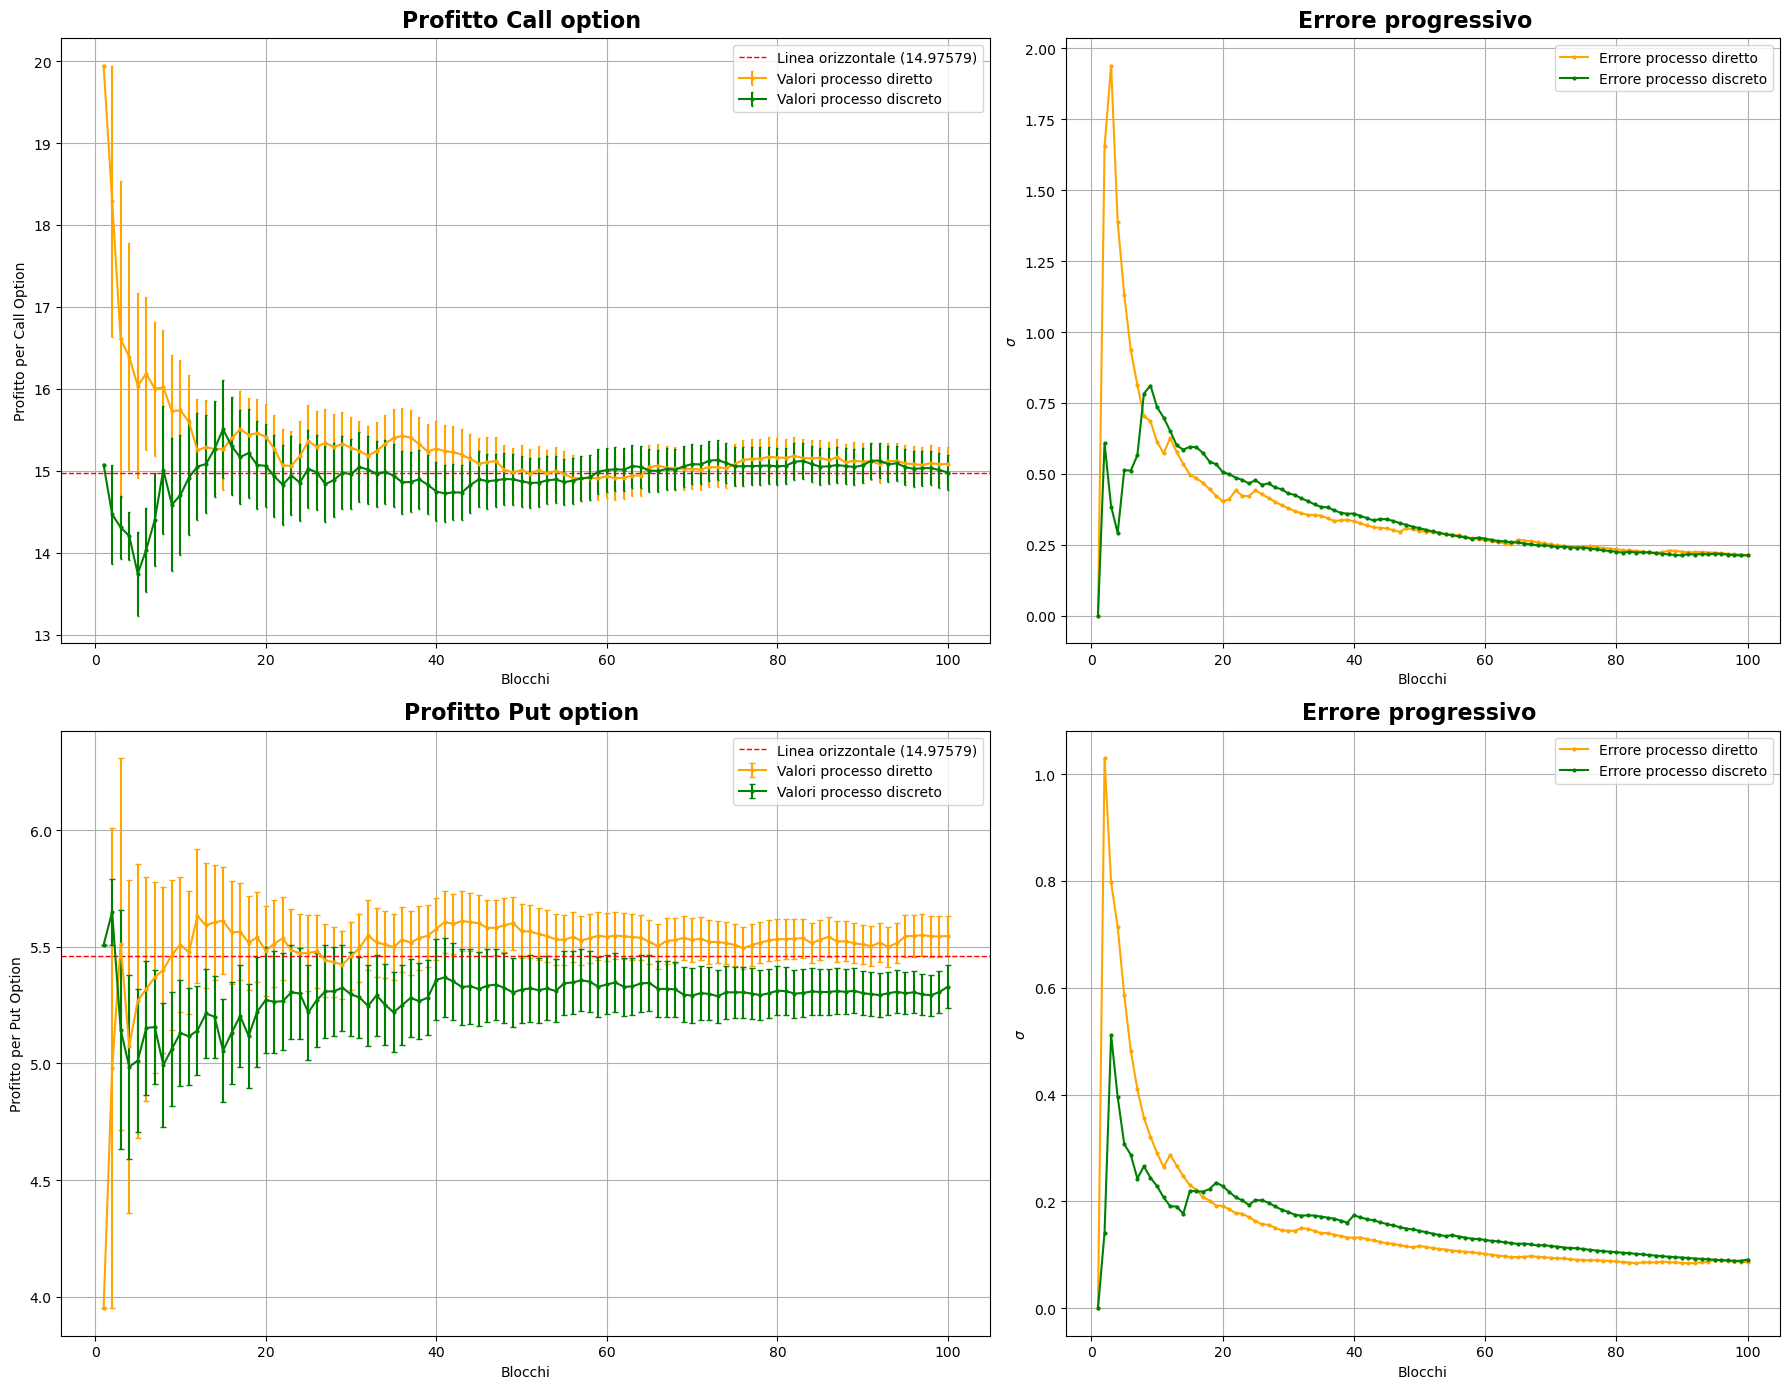

In [4]:


# Crea un layout 2x2 con subplot
fig, axs = plt.subplots(2, 2, figsize=(18, 14), gridspec_kw={'width_ratios': [1.3, 1]})

# Primo grafico (in alto a sinistra): Call profit con barre d'errore
axs[0, 0].errorbar(df['n_step'], df['Call_profit'], yerr=df['Call_err'],
                   color='orange', marker='o', markersize=2,
                   markeredgecolor='orange', capsize=1, label='Valori processo diretto')
axs[0, 0].errorbar(df1['n_step'], df1['Call_profit'], yerr=df1['Call_err'],
                   color='green', marker='o', markersize=2,
                   markeredgecolor='green', capsize=1, label='Valori processo discreto')

# Linea orizzontale del valore esatto
axs[0, 0].axhline(y=14.97579, color='red', linestyle='--', linewidth=1, label='Linea orizzontale (14.97579)')

axs[0, 0].set_title(r'Profitto Call option ', pad=8, fontweight='bold', fontsize=16)
axs[0, 0].set_xlabel('Blocchi')
axs[0, 0].set_ylabel('Profitto per Call Option')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Secondo grafico (in alto a destra): Errore progressivo
axs[0, 1].plot(df['n_step'], df['Call_err'], color='orange', marker='o', markersize=2,
               markeredgecolor='orange', label='Errore processo diretto')

axs[0, 1].plot(df1['n_step'], df1['Call_err'], color='green', marker='o', markersize=2,
               markeredgecolor='green', label='Errore processo discreto')

axs[0, 1].set_title(r'Errore progressivo  ', pad=8, fontweight='bold', fontsize=16)
axs[0, 1].set_xlabel('Blocchi')
axs[0,1].legend()

axs[0, 1].set_ylabel(r'$\sigma$')
axs[0, 1].grid(True)

# Grafico put option direct
axs[1, 0].errorbar(df['n_step'], df['Put_profit'], yerr=df['Put_err'],
                   color='orange', marker='o', markersize=2,
                   markeredgecolor='orange', capsize=2, label='Valori processo diretto')

axs[1, 0].errorbar(df1['n_step'], df1['Put_profit'], yerr=df1['Put_err'],
                   color='green', marker='o', markersize=2,
                   markeredgecolor='green', capsize=2, label='Valori processo discreto')

axs[1, 0].axhline(y=5.46, color='red', linestyle='--', linewidth=1, label='Linea orizzontale (14.97579)')

axs[1, 0].set_title(r'Profitto Put option ', pad=8, fontweight='bold', fontsize=16)
axs[1, 0].set_xlabel('Blocchi')
axs[1, 0].set_ylabel('Profitto per Put Option')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Quarto grafico (in basso a destra): Replica del secondo grafico
axs[1, 1].plot(df['n_step'], df['Put_err'], color='orange', marker='o', markersize=2,
               markeredgecolor='orange', label='Errore processo diretto')

axs[1, 1].plot(df1['n_step'], df1['Put_err'], color='green', marker='o', markersize=2,
               markeredgecolor='green', label='Errore processo discreto')

axs[1, 1].set_title(r'Errore progressivo ', fontweight='bold', fontsize=16,pad=8)
axs[1, 1].set_xlabel('Blocchi')
axs[1, 1].legend()

axs[1, 1].set_ylabel(r'$\sigma$')
axs[1, 1].grid(True)

# Mostra tutti i grafici
plt.tight_layout()
plt.show()

I valori delle Call_option e delle Put_option convergono a valori teorici senza mostrare particolari differenze tra processo diretto e processo discretizzato in 